# **Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# **Load datatset**

In [2]:
df = pd.read_csv('t20.csv')

In [3]:
df.drop(columns=["Unnamed: 0", "Unnamed: 15"], inplace=True)

# **Data cleaning**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2006 entries, 0 to 2005
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Player  2006 non-null   object
 1   Span    2006 non-null   object
 2   Mat     2006 non-null   int64 
 3   Inns    2006 non-null   object
 4   NO      2006 non-null   object
 5   Runs    2006 non-null   object
 6   HS      2006 non-null   object
 7   Ave     2006 non-null   object
 8   BF      2006 non-null   object
 9   SR      2006 non-null   object
 10  100     2006 non-null   object
 11  50      2006 non-null   object
 12  0       2006 non-null   object
 13  4s      2006 non-null   object
 14  6s      2006 non-null   object
dtypes: int64(1), object(14)
memory usage: 235.2+ KB


In [5]:
df['Not_Out_HS'] = df['HS'].astype(str).str.contains(r'\*')
df['HS'] = (
    df['HS']
    .astype(str)
    .replace('-', pd.NA)
    .str.replace('*', '', regex=False)
    .astype('Int64')
)

numeric_cols = ['Mat', 'Inns', 'NO', 'Runs', 'Ave', 'BF', 'SR', '100', '50', '0', '4s', '6s']

df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')

df["Name"] = df["Player"].str.extract(r'^(.*?)\s*\(')
df["Country"] = df["Player"].str.extract(r'\((.*?)\)')

np.random.seed(42)
df['Age'] = np.random.randint(18, 40, size=len(df))

df.drop(columns=['Player'], inplace=True)

df = df.dropna()

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1672 entries, 0 to 1852
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Span        1672 non-null   object 
 1   Mat         1672 non-null   int64  
 2   Inns        1672 non-null   float64
 3   NO          1672 non-null   float64
 4   Runs        1672 non-null   float64
 5   HS          1672 non-null   Int64  
 6   Ave         1672 non-null   float64
 7   BF          1672 non-null   float64
 8   SR          1672 non-null   float64
 9   100         1672 non-null   float64
 10  50          1672 non-null   float64
 11  0           1672 non-null   float64
 12  4s          1672 non-null   float64
 13  6s          1672 non-null   float64
 14  Not_Out_HS  1672 non-null   bool   
 15  Name        1672 non-null   object 
 16  Country     1672 non-null   object 
 17  Age         1672 non-null   int32  
dtypes: Int64(1), bool(1), float64(11), int32(1), int64(1), object(3)
memory u

In [7]:
df.isnull().sum()

Span          0
Mat           0
Inns          0
NO            0
Runs          0
HS            0
Ave           0
BF            0
SR            0
100           0
50            0
0             0
4s            0
6s            0
Not_Out_HS    0
Name          0
Country       0
Age           0
dtype: int64

In [8]:
df.head()

,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,4s,6s,Not_Out_HS,Name,Country,Age
0,2010-2019,75,70.0,20.0,2633.0,94,52.66,1907.0,138.07,0.0,24.0,2.0,247.0,71.0,True,V Kohli,INDIA,24
1,2007-2019,104,96.0,14.0,2633.0,118,32.10,1905.0,138.21,4.0,19.0,6.0,234.0,120.0,False,RG Sharma,INDIA,37
2,2009-2019,83,80.0,7.0,2436.0,105,33.36,1810.0,134.58,2.0,15.0,2.0,215.0,113.0,False,MJ Guptill,NZ,32
3,2006-2019,111,104.0,30.0,2263.0,75,30.58,1824.0,124.06,0.0,7.0,1.0,186.0,61.0,False,Shoaib Malik,ICC/PAK,28
4,2005-2015,71,70.0,10.0,2140.0,123,35.66,1571.0,136.21,2.0,13.0,3.0,199.0,91.0,False,BB McCullum,NZ,25


# **Prac1**

In [9]:
df.head()

,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,4s,6s,Not_Out_HS,Name,Country,Age
0,2010-2019,75,70.0,20.0,2633.0,94,52.66,1907.0,138.07,0.0,24.0,2.0,247.0,71.0,True,V Kohli,INDIA,24
1,2007-2019,104,96.0,14.0,2633.0,118,32.10,1905.0,138.21,4.0,19.0,6.0,234.0,120.0,False,RG Sharma,INDIA,37
2,2009-2019,83,80.0,7.0,2436.0,105,33.36,1810.0,134.58,2.0,15.0,2.0,215.0,113.0,False,MJ Guptill,NZ,32
3,2006-2019,111,104.0,30.0,2263.0,75,30.58,1824.0,124.06,0.0,7.0,1.0,186.0,61.0,False,Shoaib Malik,ICC/PAK,28
4,2005-2015,71,70.0,10.0,2140.0,123,35.66,1571.0,136.21,2.0,13.0,3.0,199.0,91.0,False,BB McCullum,NZ,25


Mat – Matches played

Inns – Innings

Runs – Total runs scored

NO – Not outs

HS – Highest score

Ave – Batting average

SR – Strike rate

100, 50 – Centuries and half-centuries

4s, 6s – Boundaries

In [10]:
df.describe()

,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,4s,6s,Age
count,1672.000000,1672.000000,1672.000000,1672.000000,1672.0,1672.000000,1672.000000,1672.000000,1672.000000,1672.000000,1672.000000,1672.000000,1672.000000,1672.000000
mean,12.815191,9.691986,1.956938,159.630383,30.258971,15.525538,134.260167,96.732315,0.032895,0.632775,0.901914,13.660885,5.514354,28.355263
std,15.807109,13.614430,3.170678,317.789470,27.126506,12.683900,245.356300,40.610268,0.231032,1.883267,1.332266,29.465442,12.527830,6.469788
min,1.000000,1.000000,0.000000,0.000000,0.0,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000
25%,3.000000,2.000000,0.000000,14.000000,9.0,6.645000,17.000000,72.982500,0.000000,0.000000,0.000000,1.000000,0.000000,23.000000
50%,7.000000,4.000000,1.000000,45.500000,22.0,13.330000,47.000000,100.000000,0.000000,0.000000,0.000000,3.000000,1.000000,28.000000
75%,15.000000,11.000000,2.250000,141.000000,44.0,21.330000,128.000000,122.645000,0.000000,0.000000,1.000000,12.000000,5.000000,34.000000
max,111.000000,104.000000,42.000000,2633.000000,172.0,126.000000,1907.000000,305.550000,4.000000,24.000000,10.000000,247.000000,120.000000,39.000000


## **1. Histograms**

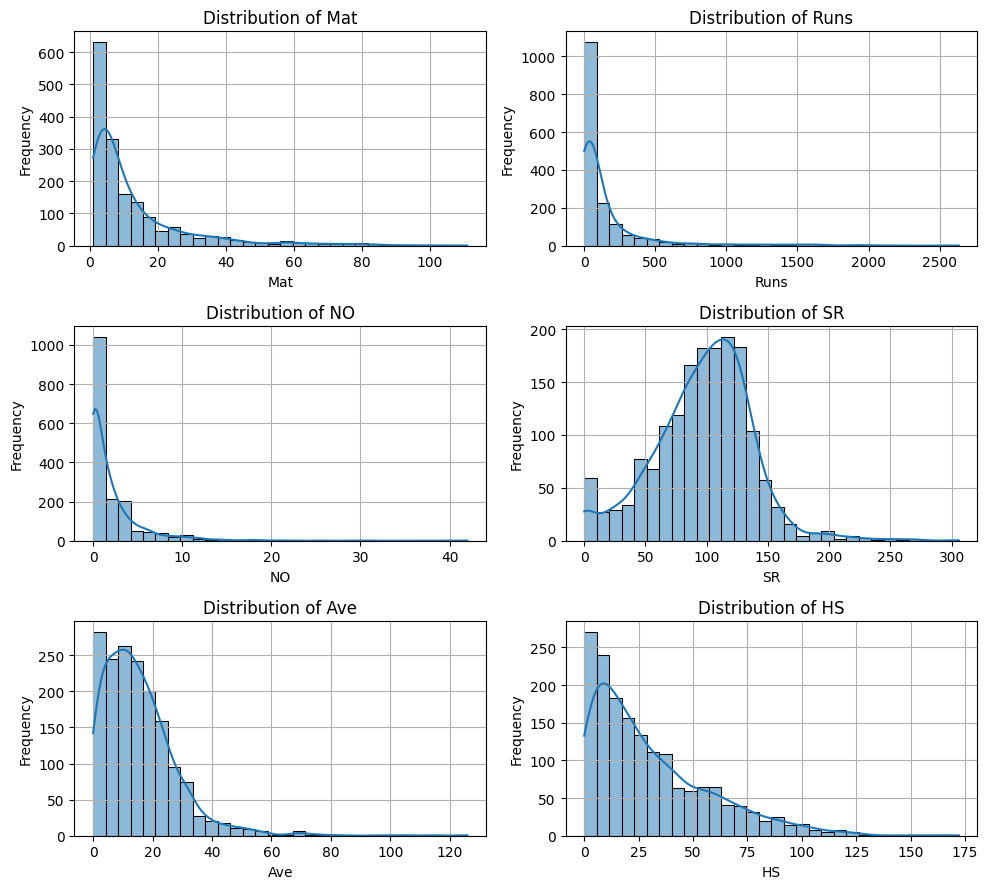

In [11]:
numeric_cols = ['Mat', 'Runs', 'NO', 'SR', 'Ave', 'HS']

fig, axes = plt.subplots(3, 2, figsize=(10, 9))
axes = axes.flatten()

for ax, col in zip(axes, numeric_cols):
    sns.histplot(df[col].dropna(), bins=30, kde=True, ax=ax)
    ax.set_title(f'Distribution of {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')
    ax.grid(True)

plt.tight_layout()
plt.show()

## **2. Box plots**

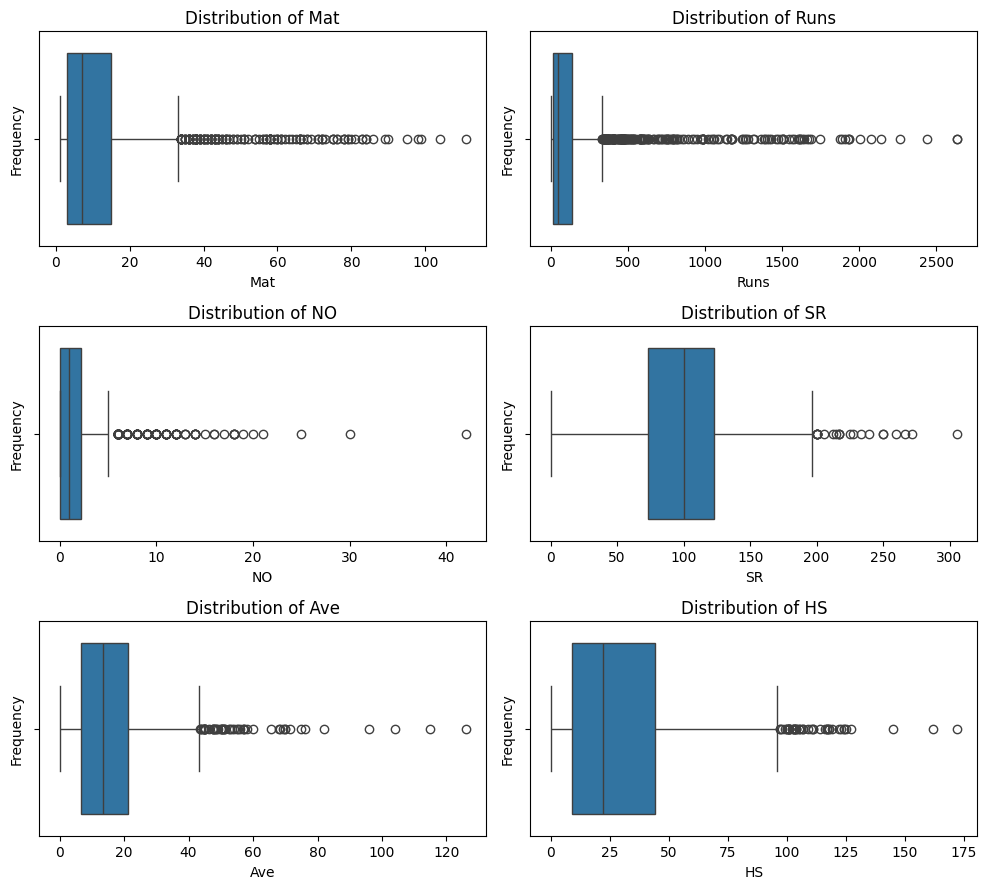

In [12]:
fig, axes = plt.subplots(3, 2, figsize=(10, 9))
axes = axes.flatten()

for ax, col in zip(axes, numeric_cols):
    sns.boxplot(x=df[col], ax=ax)
    ax.set_title(f'Distribution of {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

## **3. Scatter plot**

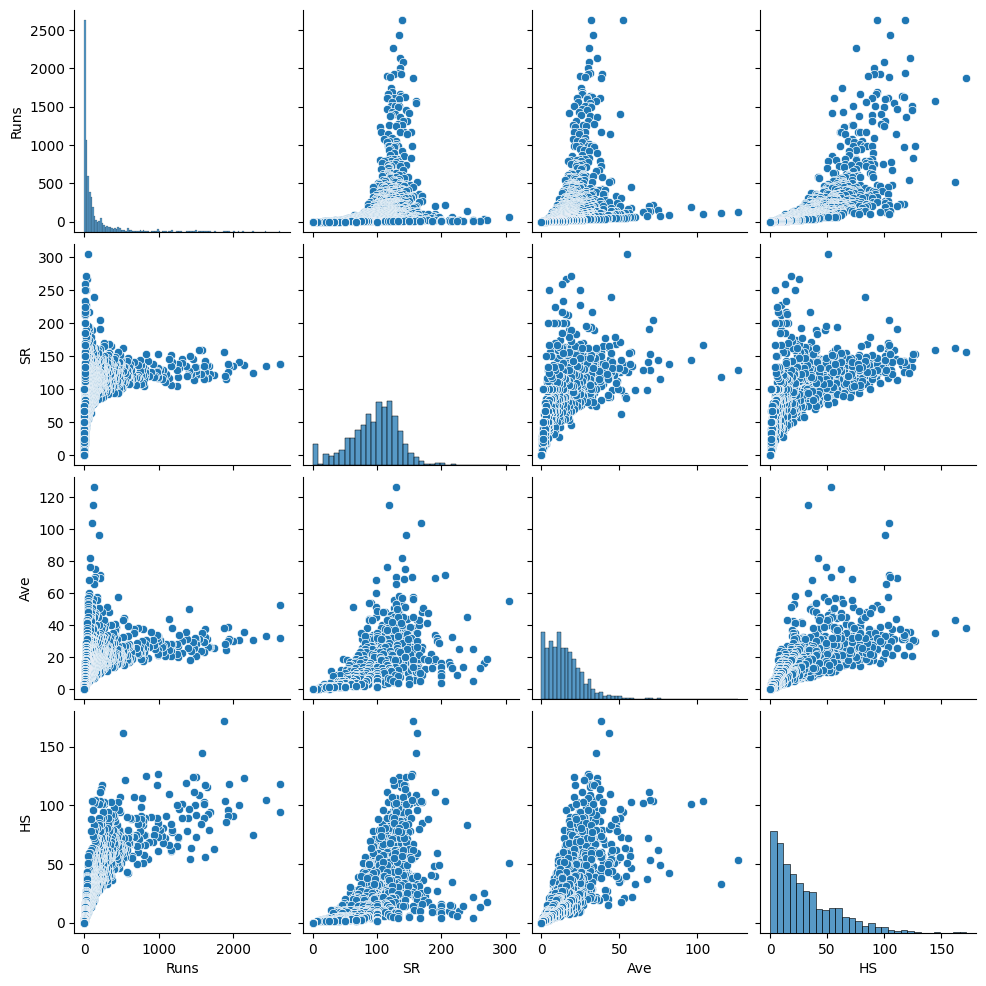

In [13]:
cols = ['Runs', 'SR', 'Ave', 'HS']

sns.pairplot(df[cols])
plt.show()

## **4. Correlation**

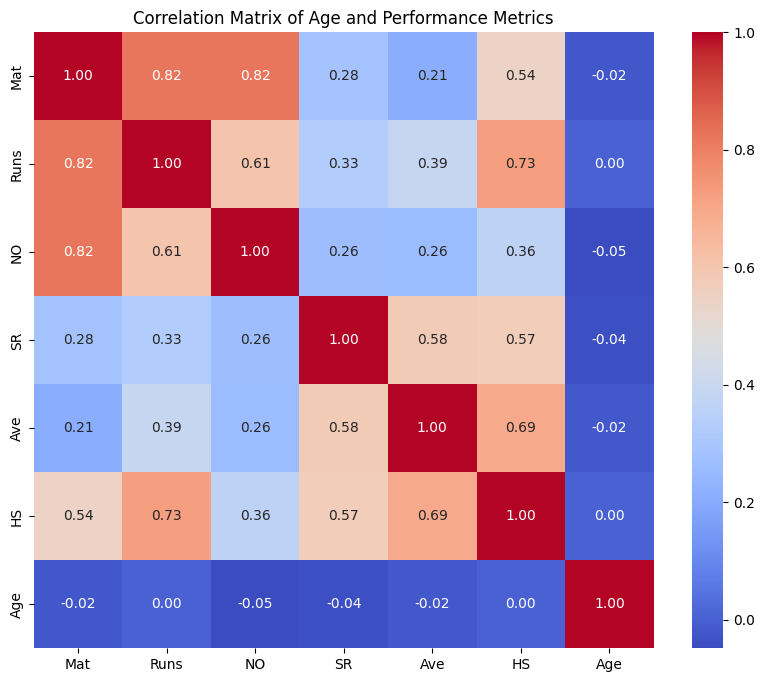

In [14]:
cols = ['Mat', 'Runs', 'NO', 'SR', 'Ave', 'HS', 'Age']

plt.figure(figsize=(10, 8))
corr = df[cols].corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix of Age and Performance Metrics')
plt.show()

# **Prac2**

In [15]:
# batting average
df['bating_avg'] = df['Runs'] / (df['Mat'] - df['NO'])

In [16]:
df.head()

,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,4s,6s,Not_Out_HS,Name,Country,Age,bating_avg
0,2010-2019,75,70.0,20.0,2633.0,94,52.66,1907.0,138.07,0.0,24.0,2.0,247.0,71.0,True,V Kohli,INDIA,24,47.872727
1,2007-2019,104,96.0,14.0,2633.0,118,32.10,1905.0,138.21,4.0,19.0,6.0,234.0,120.0,False,RG Sharma,INDIA,37,29.255556
2,2009-2019,83,80.0,7.0,2436.0,105,33.36,1810.0,134.58,2.0,15.0,2.0,215.0,113.0,False,MJ Guptill,NZ,32,32.052632
3,2006-2019,111,104.0,30.0,2263.0,75,30.58,1824.0,124.06,0.0,7.0,1.0,186.0,61.0,False,Shoaib Malik,ICC/PAK,28,27.938272
4,2005-2015,71,70.0,10.0,2140.0,123,35.66,1571.0,136.21,2.0,13.0,3.0,199.0,91.0,False,BB McCullum,NZ,25,35.081967


In [17]:
df[['Name', 'bating_avg', 'Runs', 'SR']].head()

,Name,bating_avg,Runs,SR
0,V Kohli,47.872727,2633.0,138.07
1,RG Sharma,29.255556,2633.0,138.21
2,MJ Guptill,32.052632,2436.0,134.58
3,Shoaib Malik,27.938272,2263.0,124.06
4,BB McCullum,35.081967,2140.0,136.21


In [18]:
# top batsmen
top_batsmen = df.sort_values(
    by=['Runs', 'Ave', 'SR'],
    ascending=[False, False, False]
).head(10)

top_batsmen[['Name', 'Runs', 'Ave', 'SR', '50', '100']]


,Name,Runs,Ave,SR,50,100
0,V Kohli,2633.0,52.66,138.07,24.0,0.0
1,RG Sharma,2633.0,32.10,138.21,19.0,4.0
2,MJ Guptill,2436.0,33.36,134.58,15.0,2.0
3,Shoaib Malik,2263.0,30.58,124.06,7.0,0.0
4,BB McCullum,2140.0,35.66,136.21,13.0,2.0
5,DA Warner,2079.0,30.57,140.85,15.0,1.0
6,EJG Morgan,2002.0,29.88,135.72,11.0,0.0
7,Mohammad Shahzad,1936.0,31.22,134.81,12.0,1.0
8,JP Duminy,1934.0,38.68,126.24,11.0,0.0
9,PR Stirling,1929.0,29.67,137.68,16.0,0.0


In [19]:
# Average runs vs opponents
opponent_perf = (
    df.groupby(['Name'])['Runs']
    .mean()
    .reset_index()
).sort_values(by='Runs', ascending=False).head(10)

opponent_perf

,Name,Runs
1577,V Kohli,2633.0
1226,RG Sharma,2633.0
910,MJ Guptill,2436.0
1466,Shoaib Malik,2263.0
226,BB McCullum,2140.0
357,DA Warner,2079.0
428,EJG Morgan,2002.0
712,JP Duminy,1934.0
1175,PR Stirling,1929.0
986,Mohammad Hafeez,1908.0


# **Prac3**

In [20]:
df2 = pd.read_csv('Bowling_t20.csv')

In [21]:
df2.drop(columns=['Unnamed: 0', 'Unnamed: 14'], inplace=True)

## **a**

In [22]:
df2.head()

,Player,Span,Mat,Inns,Overs,Mdns,Runs,Wkts,BBI,Ave,Econ,SR,4,5
0,SL Malinga (SL),2006-2019,79,79,284.5,1,2061,106,5/6,19.44,7.23,16.1,1,2
1,Shahid Afridi (ICC/PAK),2006-2018,99,97,361.2,4,2396,98,4/11,24.44,6.63,22.1,3,0
2,Shakib Al Hasan (BDESH),2006-2019,76,75,277.5,2,1894,92,5/20,20.58,6.81,18.1,3,1
3,Saeed Ajmal (PAK),2009-2015,64,63,238.2,2,1516,85,4/19,17.83,6.36,16.8,4,0
4,Umar Gul (PAK),2007-2016,60,60,200.3,2,1443,85,5/6,16.97,7.19,14.1,4,2


Mat – Matches played

Inns – Innings bowled

Overs – Overs delivered

Runs – Runs conceded

Wkts – Wickets taken

Ave (Bowling Average) – Runs per wicket (lower = better)

Econ (Economy Rate) – Runs per over (lower = better)

SR (Strike Rate) – Balls per wicket (lower = better)

BBI – Best Bowling in an Innings

4 / 5 – Four-wicket and five-wicket hauls

In [23]:
col = ['Inns', 'Overs', 'Mdns','Runs', 'Wkts', 'Ave', 'Econ', 'SR', '4', '5']

df2[col] = df2[col].apply(pd.to_numeric, errors='coerce')

In [24]:
df2 = df2.dropna()

In [25]:
df2.isnull().sum()

Player    0
Span      0
Mat       0
Inns      0
Overs     0
Mdns      0
Runs      0
Wkts      0
BBI       0
Ave       0
Econ      0
SR        0
4         0
5         0
dtype: int64

In [26]:
df2.head()

,Player,Span,Mat,Inns,Overs,Mdns,Runs,Wkts,BBI,Ave,Econ,SR,4,5
0,SL Malinga (SL),2006-2019,79,79.0,284.5,1.0,2061.0,106.0,5/6,19.44,7.23,16.1,1.0,2.0
1,Shahid Afridi (ICC/PAK),2006-2018,99,97.0,361.2,4.0,2396.0,98.0,4/11,24.44,6.63,22.1,3.0,0.0
2,Shakib Al Hasan (BDESH),2006-2019,76,75.0,277.5,2.0,1894.0,92.0,5/20,20.58,6.81,18.1,3.0,1.0
3,Saeed Ajmal (PAK),2009-2015,64,63.0,238.2,2.0,1516.0,85.0,4/19,17.83,6.36,16.8,4.0,0.0
4,Umar Gul (PAK),2007-2016,60,60.0,200.3,2.0,1443.0,85.0,5/6,16.97,7.19,14.1,4.0,2.0


In [27]:
df2.describe()

,Mat,Inns,Overs,Mdns,Runs,Wkts,Ave,Econ,SR,4,5
count,1141.000000,1141.000000,1141.000000,1141.000000,1141.000000,1141.000000,1141.000000,1141.000000,1141.000000,1141.000000,1141.000000
mean,13.102542,10.292726,32.211656,0.410167,239.042945,10.301490,27.619816,7.557739,21.709991,0.179667,0.036810
std,15.548255,12.144822,40.877597,0.855345,299.261015,13.515368,16.211046,1.790860,11.543027,0.488614,0.210376
min,1.000000,1.000000,0.200000,0.000000,1.000000,1.000000,1.000000,1.330000,2.000000,0.000000,0.000000
25%,4.000000,3.000000,8.000000,0.000000,58.000000,2.000000,17.270000,6.500000,15.000000,0.000000,0.000000
50%,7.000000,5.000000,16.000000,0.000000,118.000000,5.000000,24.000000,7.440000,19.200000,0.000000,0.000000
75%,16.000000,12.000000,39.000000,1.000000,299.000000,12.000000,33.330000,8.500000,24.600000,0.000000,0.000000
max,111.000000,97.000000,361.200000,6.000000,2396.000000,106.000000,158.000000,18.000000,144.000000,4.000000,2.000000


1. The bowling average is given by 
$\frac{\text{Total Runs Conceded}}{\text{Total Wickets Taken}}$.

2. The Economy rate is given by
$\frac{\text{Total Runs Conceded}}{\text{Total Overs Bowled}}$

In [28]:
df2[['Ave', 'Econ', 'Wkts']].head()

,Ave,Econ,Wkts
0,19.44,7.23,106.0
1,24.44,6.63,98.0
2,20.58,6.81,92.0
3,17.83,6.36,85.0
4,16.97,7.19,85.0


## **b**

In [29]:
top_bowlers = df2.sort_values(
    by=['Wkts', 'Ave', 'Econ'],
    ascending=[False, True, True]
).head(10)

top_bowlers[['Player', 'Wkts', 'Ave', 'Econ']]

,Player,Wkts,Ave,Econ
0,SL Malinga (SL),106.0,19.44,7.23
1,Shahid Afridi (ICC/PAK),98.0,24.44,6.63
2,Shakib Al Hasan (BDESH),92.0,20.58,6.81
4,Umar Gul (PAK),85.0,16.97,7.19
3,Saeed Ajmal (PAK),85.0,17.83,6.36
5,Rashid Khan (AFG/ICC),84.0,12.52,6.15
6,GH Dockrell (IRE),75.0,20.52,6.95
7,TG Southee (NZ),75.0,26.05,8.36
8,Mohammad Nabi (AFG),69.0,26.65,7.16
10,BAW Mendis (SL),66.0,14.42,6.45


# **Prac4**

## Top performing batsman in different seasons

In [30]:
df['Season'] = df['Span'].str[:4].astype(int)

In [31]:
seasonal_avg = (
    df[df['Name'].isin(top_batsmen['Name'])]
    .groupby(['Season', 'Name'])['Ave']
    .mean()
    .reset_index()
)

seasonal_avg

,Season,Name,Ave
0,2005,BB McCullum,35.66
1,2006,Shoaib Malik,30.58
2,2007,JP Duminy,38.68
3,2007,RG Sharma,32.10
4,2009,DA Warner,30.57
5,2009,EJG Morgan,29.88
6,2009,MJ Guptill,33.36
7,2009,PR Stirling,29.67
8,2010,Mohammad Shahzad,31.22
9,2010,V Kohli,52.66


## Analyze the runs scoring (strike rate of Batting) of players from various teams in a specific league

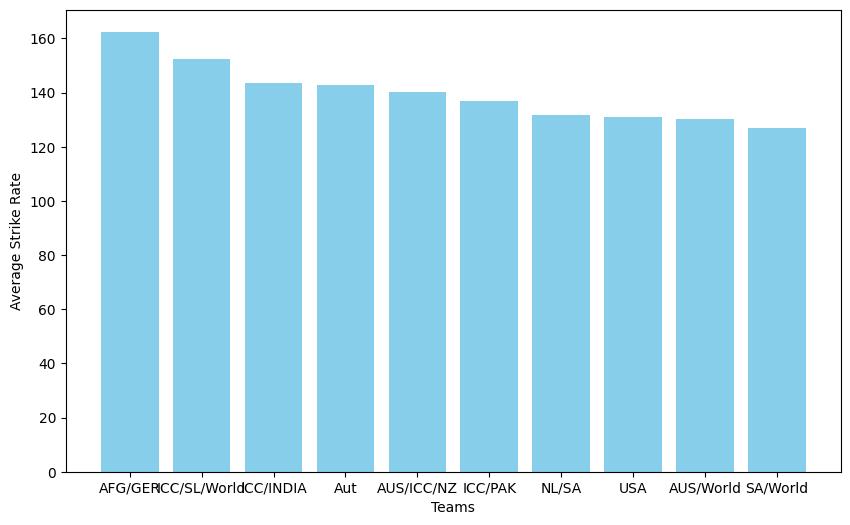

Country
AFG/GER         162.500000
ICC/SL/World    152.410000
ICC/INDIA       143.520000
Aut             142.983000
AUS/ICC/NZ      140.230000
ICC/PAK         137.030000
NL/SA           131.590000
USA             130.922500
AUS/World       130.443333
SA/World        127.060000
Name: SR, dtype: float64

In [32]:
team_sr = (
    df.groupby('Country')['SR']
    .mean()
    .sort_values(ascending=False)
).head(10)

plt.figure(figsize=(10, 6))
plt.bar(team_sr.index, team_sr.values, color='skyblue')
plt.xlabel('Teams')
plt.ylabel('Average Strike Rate')
plt.show()

team_sr

# **Prac5**

In [33]:
df3 = pd.read_csv('player_injuries_impact.csv')

## Data loading and cleaning

In [34]:
df3.head()

,Name,Team Name,Position,Age,Season,FIFA rating,Injury,Date of Injury,Date of return,Match1_before_injury_Result,...,Match1_after_injury_GD,Match1_after_injury_Player_rating,Match2_after_injury_Result,Match2_after_injury_Opposition,Match2_after_injury_GD,Match2_after_injury_Player_rating,Match3_after_injury_Result,Match3_after_injury_Opposition,Match3_after_injury_GD,Match3_after_injury_Player_rating
0,Jamaal Lascelles,Newcastle,Center Back,26,2019/20,77,Knee injury,"Nov 9, 2019","Jan 13, 2020",draw,...,1,7.1,draw,Everton,0,6.2,draw,Norwich City,0,6.7
1,Fabian Schär,Newcastle,Center Back,28,2019/20,79,Knee injury,"Oct 20, 2019","Nov 24, 2019",lose,...,N.A.,N.A.,N.A.,N.A.,N.A.,N.A.,N.A.,N.A.,N.A.,N.A.
2,Fabian Schär,Newcastle,Center Back,28,2019/20,79,Hamstring strain,"Jan 2, 2020","Jan 17, 2020",lose,...,0,6(S),lose,Arsenal,-4,N.A.,lose,Crystal Palace,-1,6.5
3,Fabian Schär,Newcastle,Center Back,28,2019/20,79,Shoulder injury,"Jul 16, 2020","Sep 28, 2020",lose,...,N.A.,N.A.,N.A.,N.A.,N.A.,N.A.,N.A.,N.A.,N.A.,N.A.
4,Paul Dummett,Newcastle,Center Back,28,2019/20,75,Groin injury,"Dec 22, 2019","Jan 10, 2020",win,...,N.A.,N.A.,N.A.,N.A.,N.A.,N.A.,N.A.,N.A.,N.A.,N.A.


In [35]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 656 entries, 0 to 655
Data columns (total 42 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Name                                656 non-null    object
 1   Team Name                           656 non-null    object
 2   Position                            656 non-null    object
 3   Age                                 656 non-null    int64 
 4   Season                              656 non-null    object
 5   FIFA rating                         656 non-null    int64 
 6   Injury                              656 non-null    object
 7   Date of Injury                      656 non-null    object
 8   Date of return                      656 non-null    object
 9   Match1_before_injury_Result         656 non-null    object
 10  Match1_before_injury_Opposition     656 non-null    object
 11  Match1_before_injury_GD             656 non-null    object

In [36]:
# Drop unnamed columns
df3 = df3.loc[:, ~df3.columns.str.contains('^Unnamed')]

# Convert data types
df3['Date of Injury'] = pd.to_datetime(df3['Date of Injury'], errors='coerce')
df3['Date of return'] = pd.to_datetime(df3['Date of return'], errors='coerce')
GD_cols = ['Match1_before_injury_GD', 
           'Match2_before_injury_GD', 
           'Match3_before_injury_GD', 
           'Match1_after_injury_GD', 
           'Match2_after_injury_GD', 
           'Match3_after_injury_GD'
           ]
df3[GD_cols] = df3[GD_cols].apply(pd.to_numeric, errors='coerce')

df3.dropna(inplace=True)

# converting categorical cols
points = {'win': 3, 'lose': 0, 'draw': 1}
cols = ['Match1_before_injury_Result', 
        'Match1_after_injury_Result', 
        'Match2_before_injury_Result', 
        'Match2_after_injury_Result', 
        'Match3_before_injury_Result', 
        'Match3_after_injury_Result'
        ]
df3[cols] = df3[cols].replace(points).astype('Int64')

C:\Users\zamir\AppData\Local\Temp\ipykernel_21880\1266977436.py:27: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df3[cols] = df3[cols].replace(points).astype('Int64')


In [37]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 252 entries, 0 to 655
Data columns (total 42 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   Name                                252 non-null    object        
 1   Team Name                           252 non-null    object        
 2   Position                            252 non-null    object        
 3   Age                                 252 non-null    int64         
 4   Season                              252 non-null    object        
 5   FIFA rating                         252 non-null    int64         
 6   Injury                              252 non-null    object        
 7   Date of Injury                      252 non-null    datetime64[ns]
 8   Date of return                      252 non-null    datetime64[ns]
 9   Match1_before_injury_Result         252 non-null    Int64         
 10  Match1_before_injury_Opposition

## **a**

In [38]:
cols = ['Match1_before_injury_Result', 'Match2_before_injury_Result', 'Match3_before_injury_Result']

position_df = (
    df3.groupby(['Name', 'Position'])[cols]
    .mean()
    .mean(axis=1)
    .reset_index(name='Avg_match_result_postion_based')
)

position_df.head(10)

,Name,Position,Avg_match_result_postion_based
0,Aaron Hickey,Right Back,0.333333
1,Aaron Wan-Bissaka,Right Back,1.333333
2,Abdoulaye Doucouré,Central Midfielder,2.444444
3,Alex Iwobi,Left winger,2.0
4,Alexander Isak,Center Forward,1.666667
5,Alexandre Lacazette,Center Forward,1.0
6,Allan,Defensive Midfielder,2.666667
7,Allan Saint-Maximin,Left winger,1.444444
8,Amadou Onana,Defensive Midfielder,1.333333
9,Andros Townsend,Right winger,1.0


# **Prac6**

## Investigate the relationship between player injuries and their subsequentperformance using historical injury and performance data.

In [39]:
df3['Recovery_days'] = df3['Date of return'] - df3['Date of Injury']

df3[['Name', 'Recovery_days']].head()

,Name,Recovery_days
0,Jamaal Lascelles,65 days
2,Fabian Schär,15 days
5,Ciaran Clark,32 days
7,Jetro Willems,13 days
8,Jetro Willems,10 days


In [40]:
# average rating before player injury

rating_cols_before = [
    'Match1_before_injury_Player_rating',
    'Match2_before_injury_Player_rating',
    'Match3_before_injury_Player_rating'
]

df3[rating_cols_before] = df3[rating_cols_before].apply(pd.to_numeric, errors='coerce')

df3 = df3.dropna()

avg_rating_before = (
    df3
    .groupby(['Name', 'Recovery_days', 'Injury'])[rating_cols_before]
    .mean()
    .mean(axis=1)   # average across matches
    .reset_index(name='Avg_Rating_Before_injury')
)

# avg rating after player injury

rating_cols_after = [
    'Match1_after_injury_Player_rating',
    'Match2_after_injury_Player_rating',
    'Match3_after_injury_Player_rating'
]

df3[rating_cols_after] = df3[rating_cols_after].apply(pd.to_numeric, errors='coerce')

df3 = df3.dropna()

avg_rating_after = (
    df3
    .groupby('Name')[rating_cols_after]
    .mean()
    .mean(axis=1)   # average across matches
    .reset_index(name='Avg_Rating_after_injury')
)

# performance impact due to injury
performance_impact = pd.merge(
    avg_rating_before,
    avg_rating_after,
    on='Name'
)

performance_impact['delta_rating'] = performance_impact['Avg_Rating_after_injury'] - performance_impact['Avg_Rating_Before_injury']

performance_impact.head(10)

,Name,Recovery_days,Injury,Avg_Rating_Before_injury,Avg_Rating_after_injury,delta_rating
0,Abdoulaye Doucouré,26 days,thigh problems,6.833333,6.311111,-0.522222
1,Abdoulaye Doucouré,42 days,stress reaction of the bone,7.466667,6.311111,-1.155556
2,Abdoulaye Doucouré,64 days,foot injury,6.500000,6.311111,-0.188889
3,Alexander Isak,24 days,Groin injury,6.866667,6.566667,-0.300000
4,Allan,14 days,groin injury,6.900000,6.366667,-0.533333
5,Allan,58 days,muscle injury,6.533333,6.366667,-0.166667
6,Allan Saint-Maximin,26 days,Ill & knock,7.333333,6.133333,-1.200000
7,Allan Saint-Maximin,35 days,Groin injury,6.833333,6.133333,-0.700000
8,Allan Saint-Maximin,61 days,Calf injury,6.066667,6.133333,0.066667
9,Andros Townsend,23 days,broken foot,5.833333,5.900000,0.066667


In [41]:
# avg points per match before and after injury

points_cols_before = [
    'Match1_before_injury_Result',
    'Match2_before_injury_Result',
    'Match3_before_injury_Result',
]

points_cols_after = [
    'Match1_after_injury_Result',
    'Match2_after_injury_Result',
    'Match3_after_injury_Result',
]

points_before = (
    df3
    .groupby(['Name', 'Injury'])[points_cols_before]
    .mean()
    .mean(axis=1)
    .reset_index(name='Avg_points_per_match_before_injury')
)

points_after = (
    df3
    .groupby('Name')[points_cols_after]
    .mean()
    .mean(axis=1)
    .reset_index(name='Avg_points_per_match_after_injury')
)

points_impact = pd.merge(
    points_before,
    points_after,
    on="Name"
)

points_impact['delta_points'] = points_impact['Avg_points_per_match_after_injury'] - points_impact['Avg_points_per_match_before_injury']

points_impact.head(10)



,Name,Injury,Avg_points_per_match_before_injury,Avg_points_per_match_after_injury,delta_points
0,Abdoulaye Doucouré,foot injury,3.0,1.111111,-1.888889
1,Abdoulaye Doucouré,stress reaction of the bone,1.333333,1.111111,-0.222222
2,Abdoulaye Doucouré,thigh problems,3.0,1.111111,-1.888889
3,Alexander Isak,Groin injury,1.0,2.0,1.0
4,Allan,groin injury,3.0,0.333333,-2.666667
5,Allan Saint-Maximin,Calf injury,1.0,1.666667,0.666667
6,Allan Saint-Maximin,Groin injury,0.333333,1.666667,1.333333
7,Andros Townsend,broken foot,1.0,0.0,-1.0
8,André Gomes,bruised ribs,2.0,1.333333,-0.666667
9,Anwar El Ghazi,Knee injury,2.333333,1.0,-1.333333


In [42]:
# avg goal difference (GD) per match before and after injury

gd_cols_before = [
    'Match1_before_injury_GD',
    'Match2_before_injury_GD',
    'Match3_before_injury_GD',
]

gd_cols_after = [
    'Match1_after_injury_GD',
    'Match2_after_injury_GD',
    'Match3_after_injury_GD',
]

gd_before = (
    df3
    .groupby(['Name', 'Injury'])[gd_cols_before]
    .mean()
    .mean(axis=1)
    .reset_index(name='Avg_gd_per_match_before_injury')
)

gd_after = (
    df3
    .groupby('Name')[gd_cols_after]
    .mean()
    .mean(axis=1)
    .reset_index(name='Avg_gd_per_match_after_injury')
)

gd_impact = pd.merge(
    gd_before,
    gd_after,
    on="Name"
)

gd_impact['delta_gd'] = gd_impact['Avg_gd_per_match_after_injury'] - gd_impact['Avg_gd_per_match_before_injury']

gd_impact.head(10)

,Name,Injury,Avg_gd_per_match_before_injury,Avg_gd_per_match_after_injury,delta_gd
0,Abdoulaye Doucouré,foot injury,1.333333,-0.333333,-1.666667
1,Abdoulaye Doucouré,stress reaction of the bone,0.333333,-0.333333,-0.666667
2,Abdoulaye Doucouré,thigh problems,2.333333,-0.333333,-2.666667
3,Alexander Isak,Groin injury,-0.333333,-0.333333,0.000000
4,Allan,groin injury,1.666667,-1.000000,-2.666667
5,Allan Saint-Maximin,Calf injury,-1.000000,0.166667,1.166667
6,Allan Saint-Maximin,Groin injury,-1.333333,0.166667,1.500000
7,Andros Townsend,broken foot,-1.333333,-1.666667,-0.333333
8,André Gomes,bruised ribs,0.000000,0.333333,0.333333
9,Anwar El Ghazi,Knee injury,1.000000,0.333333,-0.666667


# **Prac7**

Analyze the impact of toss on a team's overall scoring and winning percentage.

In [43]:
np.random.seed(42)
df['toss'] = np.random.randint(0, 2, size=len(df))
df['Match_result'] = np.random.randint(0, 2, size=len(df))
df['Bat_first'] = np.random.randint(0, 2, size=len(df))

In [44]:
df.head(5)

,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,...,6s,Not_Out_HS,Name,Country,Age,bating_avg,Season,toss,Match_result,Bat_first
0,2010-2019,75,70.0,20.0,2633.0,94,52.66,1907.0,138.07,0.0,...,71.0,True,V Kohli,INDIA,24,47.872727,2010,0,1,1
1,2007-2019,104,96.0,14.0,2633.0,118,32.10,1905.0,138.21,4.0,...,120.0,False,RG Sharma,INDIA,37,29.255556,2007,1,0,1
2,2009-2019,83,80.0,7.0,2436.0,105,33.36,1810.0,134.58,2.0,...,113.0,False,MJ Guptill,NZ,32,32.052632,2009,0,0,1
3,2006-2019,111,104.0,30.0,2263.0,75,30.58,1824.0,124.06,0.0,...,61.0,False,Shoaib Malik,ICC/PAK,28,27.938272,2006,0,0,0
4,2005-2015,71,70.0,10.0,2140.0,123,35.66,1571.0,136.21,2.0,...,91.0,False,BB McCullum,NZ,25,35.081967,2005,0,0,1


In [45]:
# overall toss winnig percentage

toss_win_summary = (
    df
    .groupby('toss')
    .agg(
        Matches=('Match_result', 'count'),
        Wins=('Match_result', 'sum')
    )
)

toss_win_summary['Winning_Percentage'] = (
    toss_win_summary['Wins'] / toss_win_summary['Matches']
) * 100

toss_win_summary

,Matches,Wins,Winning_Percentage
toss,,,
0,844,409,48.459716
1,828,429,51.811594


In [46]:
# overall scoring percentage when batting first vs second

score_summary = (
    df[df['toss'] == 1]
    .groupby('Bat_first')
    .agg(
        Avg_Score=('Runs', 'mean'),
        Matches=('Runs', 'count')
    )
)

score_summary

,Avg_Score,Matches
Bat_first,,
0,158.541176,425
1,169.434243,403


Batting Averages vs Team Win–Loss Record

In [47]:
batting_win_loss = (
    df
    .groupby('Match_result')
    .agg(
        Batting_Avg=('bating_avg', 'mean'),
        Players=('Name', 'count')
    )
)

print(batting_win_loss, '\n')
print("Correlation Matrix: \n", df[['bating_avg', 'Match_result']].corr())

              Batting_Avg  Players
Match_result                      
0               12.855126      834
1               11.887734      838 

Correlation Matrix: 
               bating_avg  Match_result
bating_avg      1.000000     -0.041165
Match_result   -0.041165      1.000000


# **Prac8**

In [48]:
df4 = pd.read_csv('top_expensive_leagues.csv')

# synthetic data
np.random.seed(42)
df4['tickets_revenue'] = np.random.randint(8000, 20001, size=len(df4))

items_sold = np.random.randint(500, 2001, size=len(df4))
merch_avg_price = np.round(np.random.uniform(15, 50, size=len(df4)), 2)
df4['merch_revenue'] = np.round(items_sold * merch_avg_price, 2)

df4 = df4.rename(columns={
    'Viewership': 'Sponsorship_revenue'
})

df4['total_revenue'] = df4[['tickets_revenue', 'merch_revenue', 'Sponsorship_revenue', 'Revenue (USD)']].sum(axis=1)

df4.head()

,League ID,League Name,Country,Sport,Revenue (USD),Average Player Salary (USD),Top Team,Total Teams,Founded Year,Sponsorship_revenue,tickets_revenue,merch_revenue,total_revenue
0,L001,Premier League,England,Football,5.275330e+09,12080000.0,Liverpool,16,1886,485.90,15270,22857.12,5.275369e+09
1,L002,Serie A,India,American Football,7.088640e+09,6730000.0,Inter Milan,13,1977,135.01,8860,17853.40,7.088667e+09
2,L003,IPL,England,American Football,7.930520e+09,14360000.0,Chennai Super Kings,13,1979,157.49,13390,30701.03,7.930564e+09
3,L004,La Liga,Spain,American Football,4.972890e+09,13720000.0,Atletico Madrid,22,1999,245.71,13191,25931.60,4.972929e+09
4,L005,Serie A,Italy,Basketball,6.265740e+09,7450000.0,Juventus,16,1963,52.83,19964,68812.77,6.265829e+09


## Analyze revenue generation in sports organizations by examining factors such as ticket sales, merchandise sales, and sponsorship deals. 

In [49]:
# sponsorship revenue by leagues
leagues_sponsorship = (
    df4
    .groupby('League Name', as_index=False)['Sponsorship_revenue']
    .sum()
).sort_values(by='Sponsorship_revenue', ascending=False)

# tickets revenue by leagues
leagues_ticket_sales = (
    df4
    .groupby('League Name', as_index=False)['tickets_revenue']
    .sum()
).sort_values(by='tickets_revenue', ascending=False)

# merchandise revenue by leagues
leagues_merch_sales = (
    df4
    .groupby('League Name', as_index=False)['merch_revenue']
    .sum()
).sort_values(by='merch_revenue', ascending=False)

print(leagues_sponsorship, '\n')
print(leagues_ticket_sales, '\n')
print(leagues_merch_sales)

      League Name  Sponsorship_revenue
6  Premier League             25541.04
7         Serie A             24556.90
1             IPL             23002.85
2         La Liga             22914.41
5             NFL             22200.41
4             NBA             21112.12
0      Bundesliga             20276.30
3         Ligue 1             19557.05 

      League Name  tickets_revenue
7         Serie A          1405120
6  Premier League          1349323
2         La Liga          1282014
0      Bundesliga          1260369
5             NFL          1225065
4             NBA          1175513
1             IPL          1104031
3         Ligue 1          1078445 

      League Name  merch_revenue
7         Serie A     4053481.81
6  Premier League     3899357.69
0      Bundesliga     3779069.13
2         La Liga     3663930.57
4             NBA     3641346.94
3         Ligue 1     3341678.00
5             NFL     3178030.20
1             IPL     3086131.65


In [50]:
# leagues by total revenue
top_leagues_revenue = df4.sort_values(by='total_revenue', ascending=False).head(10)
top_leagues_revenue[['League Name', 'total_revenue']]

,League Name,total_revenue
300,IPL,7.997054e+09
273,La Liga,7.984234e+09
369,Premier League,7.980919e+09
190,IPL,7.952730e+09
119,NFL,7.936169e+09
2,IPL,7.930564e+09
373,IPL,7.925049e+09
223,La Liga,7.913932e+09
615,Ligue 1,7.910086e+09
63,Bundesliga,7.904180e+09


## Identify key drivers of revenue and provide recommendations for maximizing financial performance.

# **Prac9**

## Build a regression model to predict the number of runs scored by players based ontheir historical performance data.

In [73]:
df = pd.read_csv('t20.csv')

df.drop(columns=["Unnamed: 0", "Unnamed: 15"], inplace=True)
df['Not_Out_HS'] = df['HS'].astype(str).str.contains(r'\*')
df['HS'] = (
    df['HS']
    .astype(str)
    .replace('-', pd.NA)
    .str.replace('*', '', regex=False)
    .astype('Int64')
)

numeric_cols = ['Mat', 'Inns', 'NO', 'Runs', 'Ave', 'BF', 'SR', '100', '50', '0', '4s', '6s']

df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')

df["Name"] = df["Player"].str.extract(r'^(.*?)\s*\(')
df["Country"] = df["Player"].str.extract(r'\((.*?)\)')

np.random.seed(42)
df['Age'] = np.random.randint(18, 40, size=len(df))

df.drop(columns=['Player'], inplace=True)

order = ['Name', 'Country', 'Age', 'Span', 'Mat', 'Inns', 'NO', 'Runs', 'HS', 'Not_Out_HS', 'Ave', 'BF', 'SR', '100', '50', '0', '4s', '6s']
df = df[order]

hs = {'True': 1, 'False': 0}
df['Not_Out_HS'] = df['Not_Out_HS'].astype('Int64').replace(hs)

df['bating_avg'] = df['Runs'] / (df['Mat'] - df['NO'])

df = df.dropna()

In [74]:
df.head()

,Name,Country,Age,Span,Mat,Inns,NO,Runs,HS,Not_Out_HS,Ave,BF,SR,100,50,0,4s,6s,bating_avg
0,V Kohli,INDIA,24,2010-2019,75,70.0,20.0,2633.0,94,1,52.66,1907.0,138.07,0.0,24.0,2.0,247.0,71.0,47.872727
1,RG Sharma,INDIA,37,2007-2019,104,96.0,14.0,2633.0,118,0,32.10,1905.0,138.21,4.0,19.0,6.0,234.0,120.0,29.255556
2,MJ Guptill,NZ,32,2009-2019,83,80.0,7.0,2436.0,105,0,33.36,1810.0,134.58,2.0,15.0,2.0,215.0,113.0,32.052632
3,Shoaib Malik,ICC/PAK,28,2006-2019,111,104.0,30.0,2263.0,75,0,30.58,1824.0,124.06,0.0,7.0,1.0,186.0,61.0,27.938272
4,BB McCullum,NZ,25,2005-2015,71,70.0,10.0,2140.0,123,0,35.66,1571.0,136.21,2.0,13.0,3.0,199.0,91.0,35.081967


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1672 entries, 0 to 1852
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Name        1672 non-null   object 
 1   Country     1672 non-null   object 
 2   Age         1672 non-null   int32  
 3   Span        1672 non-null   object 
 4   Mat         1672 non-null   int64  
 5   Inns        1672 non-null   float64
 6   NO          1672 non-null   float64
 7   Runs        1672 non-null   float64
 8   HS          1672 non-null   Int64  
 9   Not_Out_HS  1672 non-null   Int64  
 10  Ave         1672 non-null   float64
 11  BF          1672 non-null   float64
 12  SR          1672 non-null   float64
 13  100         1672 non-null   float64
 14  50          1672 non-null   float64
 15  0           1672 non-null   float64
 16  4s          1672 non-null   float64
 17  6s          1672 non-null   float64
 18  bating_avg  1672 non-null   float64
dtypes: Int64(2), float64(12), int32(

In [76]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error, r2_score


features = [
    'Ave', 'SR', 'Inns', 'BF', '100', '50',
    'Age', 'NO', 'bating_avg'
]

X = df[features]
y = df['Runs']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

In [77]:
model.intercept_, model.coef_

(161.20493642483171,
 array([-3.06259068e+00,  8.21670287e+00,  3.05752310e+01,  2.42497818e+02,
         1.60225886e+01,  4.61018196e+01,  2.61312076e-02,  4.76808725e+00,
         3.02042679e+00]))

In [78]:
y_pred = model.predict(X_test_scaled)
rmse = root_mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

rmse, r2

(25.896606138449492, 0.9910397850689913)

In [79]:
df.iloc[0]

Name            V Kohli
Country           INDIA
Age                  24
Span          2010-2019
Mat                  75
Inns               70.0
NO                 20.0
Runs             2633.0
HS                   94
Not_Out_HS            1
Ave               52.66
BF               1907.0
SR               138.07
100                 0.0
50                 24.0
0                   2.0
4s                247.0
6s                 71.0
bating_avg    47.872727
Name: 0, dtype: object

In [80]:
# predicting runs for new player
new_player = pd.DataFrame({
    'Ave': [24],
    'SR': [138],
    'Inns': [70],
    'BF': [1907],
    '100': [0.0],
    '50': [24.0],
    'Age': [24],
    'NO': [20.0],
    'bating_avg': [47.8727274]
})

new_player_scaled = scaler.transform(new_player)

predicted_runs = model.predict(new_player_scaled)
predicted_runs

array([2582.11211044])

## Develop a classification model to predict the outcome of match based on team statistics. 

In [81]:
np.random.seed(42)
df['Match_result'] = np.random.randint(0, 2, size=len(df))

In [82]:
df.head(10)

,Name,Country,Age,Span,Mat,Inns,NO,Runs,HS,Not_Out_HS,Ave,BF,SR,100,50,0,4s,6s,bating_avg,Match_result
0,V Kohli,INDIA,24,2010-2019,75,70.0,20.0,2633.0,94,1,52.66,1907.0,138.07,0.0,24.0,2.0,247.0,71.0,47.872727,0
1,RG Sharma,INDIA,37,2007-2019,104,96.0,14.0,2633.0,118,0,32.10,1905.0,138.21,4.0,19.0,6.0,234.0,120.0,29.255556,1
2,MJ Guptill,NZ,32,2009-2019,83,80.0,7.0,2436.0,105,0,33.36,1810.0,134.58,2.0,15.0,2.0,215.0,113.0,32.052632,0
3,Shoaib Malik,ICC/PAK,28,2006-2019,111,104.0,30.0,2263.0,75,0,30.58,1824.0,124.06,0.0,7.0,1.0,186.0,61.0,27.938272,0
4,BB McCullum,NZ,25,2005-2015,71,70.0,10.0,2140.0,123,0,35.66,1571.0,136.21,2.0,13.0,3.0,199.0,91.0,35.081967,0
5,DA Warner,AUS,38,2009-2019,76,76.0,8.0,2079.0,100,1,30.57,1476.0,140.85,1.0,15.0,5.0,203.0,86.0,30.573529,1
6,EJG Morgan,ENG,24,2009-2019,86,84.0,17.0,2002.0,91,0,29.88,1475.0,135.72,0.0,11.0,3.0,151.0,96.0,29.014493,0
7,Mohammad Shahzad,AFG,36,2010-2018,65,65.0,3.0,1936.0,118,1,31.22,1436.0,134.81,1.0,12.0,3.0,218.0,72.0,31.225806,0
8,JP Duminy,SA,28,2007-2019,81,75.0,25.0,1934.0,96,1,38.68,1532.0,126.24,0.0,11.0,6.0,138.0,71.0,34.535714,0
9,PR Stirling,IRE,28,2009-2019,72,71.0,6.0,1929.0,91,0,29.67,1401.0,137.68,0.0,16.0,8.0,233.0,59.0,29.227273,1


In [106]:
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

features = [
    'Ave', 'SR', 'Inns', 'BF',
    '100', '50', 'Age', 'NO', 'bating_avg', '4s', '6s'
]

X = df[features]
y = df['Match_result']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

log_clf = Pipeline([
    ('scaler', StandardScaler()),
    ('svc', SVC(max_iter=5000, random_state=42, kernel="rbf"))
])

log_clf.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svc', SVC(max_iter=5000, random_state=42))])

0.5194029850746269
              precision    recall  f1-score   support

           0       0.53      0.49      0.51       169
           1       0.51      0.55      0.53       166

    accuracy                           0.52       335
   macro avg       0.52      0.52      0.52       335
weighted avg       0.52      0.52      0.52       335



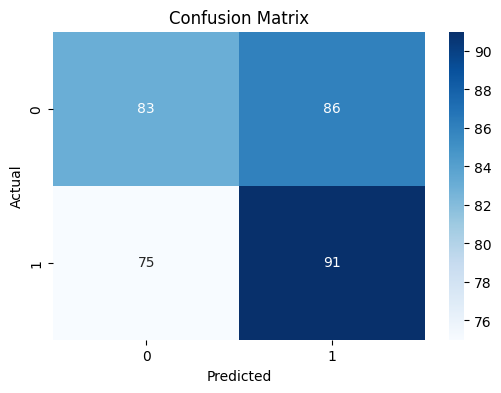

In [107]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = log_clf.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# plot
plt.figure(figsize=(6, 4))
sns.heatmap(pd.DataFrame(confusion_matrix(y_test, y_pred)), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()